Step 1: Setting Up the Environment

First, ensure you have the required libraries installed:

In [1]:
# !pip install tensorflow opencv-python-headless numpy matplotlib

Step 2: Importing Libraries

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

Step 3: Preparing the Dataset

For OCR, you can use the MNIST dataset for digit recognition. For more complex text, you might need a custom dataset.

In [3]:
mnist = tf.keras.datasets.mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 [==============================] - 1s 0us/step


Step 4: Building the Model

Create a Convolutional Neural Network (CNN) model for digit recognition.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Step 5: Training the Model

Train the CNN model on the MNIST dataset.

In [5]:
# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
#early_stopping
#model_checkpoint

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    validation_split=0.2, 
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model
model.save('final_model.keras')

Epoch 1/50
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1470 - accuracy: 0.9549 - val_loss: 0.0570 - val_accuracy: 0.9827
Epoch 2/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0468 - val_accuracy: 0.9853
Epoch 3/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 4/50
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0175 - accuracy: 0.9938 - val_loss: 0.0418 - val_accuracy: 0.9884
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0474 - val_accuracy: 0.9880
Epoch 7/50
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0398 -

Step 6: Evaluating the Model

Evaluate the model to see its performance.

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 2s 4ms/step - loss: 0.0298 - accuracy: 0.9914
Accuracy: 0.9914000034332275


Also make a plot

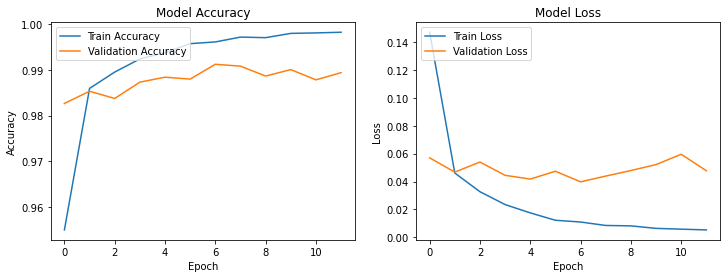

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

The best epoch is Epoch 7, which has the lowest validation loss of 0.0398 and a high validation accuracy of 0.9912.

To evaluate the model at this specific epoch, you should load the best model saved by the ModelCheckpoint callback, which already saves the model with the lowest validation loss.

In [9]:
load_model = tf.keras.models.load_model

# Load the best model
best_model = load_model('best_model.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Best Model Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0298 - accuracy: 0.9914
Best Model Accuracy: 0.9914000034332275


Step 7: Using the Model for Prediction

You can use the trained model to make predictions on new images.

In [8]:
# Load an image (example image path: 'digit.png')
image = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = image.reshape(-1, 28, 28, 1)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Step 8: Visualizing the Prediction

Display the input image and its predicted class.

In [ ]:
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.show()

Step 9: Integrating with PyQt6 (Optional)

If you want to integrate this OCR with a PyQt6 GUI, you can refer to the previous steps provided for setting up a PyQt6 application and adapting the prediction and visualization code accordingly.

This guide provides a basic framework for OCR using Keras, TensorFlow, and OpenCV. For more advanced topics such as handwriting recognition or using more complex datasets, you can look for specific tutorials and datasets that fit your needs.